## Задача 
Обучить детектор дефектов на основе тренировочного набора данных.
## Решение
### 1. Аугументация данных
Размер датасета в несколько сотен изображений недостаточен для решения задачи. К счастью, его несложно увеличить включением нескольких простых трансформаций. На самом деле, его можно было бы увеличить и еще, но я старался держать его не слишком большим чтобы сохранить высокую скорость обучения.

In [2]:
# If "RuntimeError: module compiled against API version" occurs - just rerun this cell.
# clodsa is nice but a bit buggy. 

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique

from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode

np.random.seed(1)

In [4]:
# Again, if clodsa error occurs - rerun.

PROBLEM = 'detection'
INPUT_PATH = './data/train'
OUTPUT_PATH = './data/train_aug'

augmentor = createAugmentor(
    PROBLEM,
    'pascalvoc',
    'pascalvoc',
    'linear',
    INPUT_PATH,
    {"outputPath":OUTPUT_PATH}
)

transformer = transformerGenerator(PROBLEM)

for angle in [0, 180]:
    rotate = createTechnique("rotate", {"angle" : angle})
    augmentor.addTransformer(transformer(rotate))
    
mirror = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(mirror))

up_mirror = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(up_mirror))

augmentor.applyAugmentation()

In [5]:
!python voc2coco.py './data/test' './data/test.json' 0
!python voc2coco.py './data/train_aug' './data/train_aug.json' 1

./data/test/inclusion_235.xml
add image with inclusion_235.jpg and {'width': 200, 'height': 200, 'depth': 1}
add annotation with inclusion,20180000001,1,[77, 94, 53, 85]
./data/test/scratches_233.xml
add image with scratches_233.jpg and {'width': 200, 'height': 200, 'depth': 1}
add annotation with scratches,20180000002,2,[3, 61, 197, 19]
add annotation with scratches,20180000002,2,[1, 144, 69, 12]
add annotation with scratches,20180000002,2,[81, 126, 74, 9]
add annotation with inclusion,20180000002,1,[79, 152, 12, 37]
./data/test/scratches_209.xml
add image with scratches_209.jpg and {'width': 200, 'height': 200, 'depth': 1}
add annotation with scratches,20180000003,2,[53, 1, 16, 131]
add annotation with scratches,20180000003,2,[114, 1, 30, 146]
add annotation with inclusion,20180000003,1,[115, 47, 84, 47]
./data/test/scratches_229.xml
add image with scratches_229.jpg and {'width': 200, 'height': 200, 'depth': 1}
add annotation with scratches,20180000004,2,[71, 55, 16, 145]
add annotat

./data/train_aug/342_2_inclusion_51.xml
add image with 342_2_inclusion_51.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with inclusion,20180000001,1,[129, 2, 41, 196]
./data/train_aug/407_0_inclusion_72.xml
add image with 407_0_inclusion_72.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with inclusion,20180000002,1,[92, 40, 34, 74]
./data/train_aug/348_2_inclusion_13.xml
add image with 348_2_inclusion_13.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with inclusion,20180000003,1,[101, 1, 39, 198]
add annotation with inclusion,20180000003,1,[46, 2, 48, 72]
add annotation with inclusion,20180000003,1,[5, 36, 35, 152]
add annotation with inclusion,20180000003,1,[63, 77, 26, 42]
add annotation with inclusion,20180000003,1,[60, 126, 28, 74]
./data/train_aug/12_0_inclusion_209.xml
add image with 12_0_inclusion_209.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with inclusion,20180000004,1,[33, 3, 52, 196]
add annotation

add image with 30_0_inclusion_75.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with inclusion,20180000448,1,[7, 2, 34, 196]
add annotation with inclusion,20180000448,1,[43, 76, 25, 89]
add annotation with inclusion,20180000448,1,[115, 23, 19, 56]
add annotation with inclusion,20180000448,1,[69, 97, 21, 31]
./data/train_aug/25_0_scratches_194.xml
add image with 25_0_scratches_194.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with scratches,20180000449,2,[23, 1, 19, 170]
add annotation with scratches,20180000449,2,[109, 30, 21, 100]
./data/train_aug/365_3_inclusion_4.xml
add image with 365_3_inclusion_4.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with inclusion,20180000450,1,[87, 59, 22, 98]
add annotation with inclusion,20180000450,1,[80, 155, 26, 43]
./data/train_aug/368_2_inclusion_121.xml
add image with 368_2_inclusion_121.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with inclusion,20180000451,1,[40, 16, 5

add annotation with inclusion,20180001088,1,[20, 64, 26, 121]
add annotation with inclusion,20180001088,1,[127, 11, 44, 188]
./data/train_aug/5_2_inclusion_37.xml
add image with 5_2_inclusion_37.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with inclusion,20180001089,1,[105, 2, 32, 76]
add annotation with inclusion,20180001089,1,[151, 3, 41, 195]
add annotation with inclusion,20180001089,1,[104, 90, 28, 109]
add annotation with inclusion,20180001089,1,[36, 3, 44, 195]
add annotation with inclusion,20180001089,1,[6, 2, 20, 146]
./data/train_aug/132_0_inclusion_184.xml
add image with 132_0_inclusion_184.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with inclusion,20180001090,1,[54, 1, 54, 197]
./data/train_aug/403_0_scratches_58.xml
add image with 403_0_scratches_58.jpg and {'width': 200, 'height': 200, 'depth': 3}
add annotation with scratches,20180001091,2,[18, 1, 33, 181]
./data/train_aug/42_1_scratches_46.xml
add image with 42_1_scratches_46.jpg 

### 2. Выбор модели и обучение
Беглый анализ источников по defect detection не выявил какой-то одной лидирующей архитектуры, но показал, что помимо точности модели имеет значиние ее скорость инференса. Поскольку у меня нет большого опыта с object detection и доступа к достаточно мощному "железу", я решил сосредоточится на хорошо описаных моделях со стабильными и эффективными реализациями. Я остановился на Faster R-CNN в detectron2 - [есть результаты](https://github.com/Charmve/Surface-Defect-Detection/blob/master/Papers/2019.01/Autonomous%20Structural%20Visual%20Inspection%20Using%20Region-Based%20Deep%20Learning%20for%20Detecting%20Multiple%20Damage%20Types.pdf), что с этой архитектурой mAP на аналогичной задаче может доходить до 88% при сохранении высокой скорости инференса, и ее удобно было обучать.

In [3]:
def custom_config(for_training=True):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
    
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
    
    cfg.SOLVER.BASE_LR = 1e-2
    cfg.SOLVER.MAX_ITER = 700
    cfg.SOLVER.STEPS = (20,)
    cfg.SOLVER.gamma = 0.5
    cfg.SOLVER.IMS_PER_BATCH = 4
    
    cfg.INPUT.MIN_SIZE_TRAIN = (200,)
    if for_training:
        cfg.INPUT.MIN_SIZE_TEST = (200,)
    cfg.INPUT.RANDOM_FLIP = "none"
    
    cfg.DATASETS.TEST = ('test',)
    cfg.DATASETS.TRAIN = ('train',)
    cfg.TEST.EVAL_PERIOD = 50
    
    
    cfg.OUTPUT_DIR = "./detectron_output"
    
    return cfg


class CocoTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            os.makedirs("./coco_eval", exist_ok=True)
            output_folder = "./coco_eval"
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [4]:
register_coco_instances("train", {}, "data/train_aug.json", "data/train_aug")
register_coco_instances("test", {}, "data/test.json", "data/test")
metadata = MetadataCatalog.get("train")

cfg = custom_config(for_training=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/18 18:18:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[10/18 18:18:28 d2.data.datasets.coco]: Loaded 1672 images in COCO format from data/train_aug.json
[10/18 18:18:28 d2.data.build]: Removed 0 images with no usable annotations. 1672 images left.
[10/18 18:18:28 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
| inclusion  | 2880         | scratches  | 1388         |
|            |              |            |              |
|   total    | 4268         |            |              |
[10/18 18:18:28 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(200,), max_size=1333, sample_style='choice')]
[10/18 18:18:28 d2.data.build]: Using training sampler TrainingSampler
[10/18 18:18:28 d2.data.common]: Serializing 1672 elements to byte tensors and concatenating them all ...
[10/18 18:18:28 d2.data.common]: Serialized dataset takes 0.57 MiB


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, we

[10/18 18:18:28 d2.engine.train_loop]: Starting training from iteration 0
[10/18 18:18:37 d2.utils.events]:  eta: 0:04:29  iter: 19  total_loss: 1.926  loss_cls: 0.8764  loss_box_reg: 0.09401  loss_rpn_cls: 0.9125  loss_rpn_loc: 0.09293  time: 0.3967  data_time: 0.0108  lr: 3.6871e-05  max_mem: 1204M
[10/18 18:18:45 d2.utils.events]:  eta: 0:04:25  iter: 39  total_loss: 0.7356  loss_cls: 0.3061  loss_box_reg: 0.1469  loss_rpn_cls: 0.2023  loss_rpn_loc: 0.07669  time: 0.4037  data_time: 0.0034  lr: 6.5157e-05  max_mem: 1204M
[10/18 18:18:49 d2.data.datasets.coco]: Loaded 61 images in COCO format from data/test.json
[10/18 18:18:49 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
| inclusion  | 85           | scratches  | 79           |
|            |              |            |              |
|   total    | 164          |            |              |
[10/18

[10/18 18:19:17 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP    | category   | AP    |
|:-----------|:------|:-----------|:------|
| inclusion  | 1.142 | scratches  | 2.706 |
[10/18 18:19:17 d2.engine.defaults]: Evaluation results for test in csv format:
[10/18 18:19:17 d2.evaluation.testing]: copypaste: Task: bbox
[10/18 18:19:17 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[10/18 18:19:17 d2.evaluation.testing]: copypaste: 1.9242,6.8391,0.4010,0.9820,3.0496,3.6837
[10/18 18:19:17 d2.utils.events]:  eta: 0:04:02  iter: 99  total_loss: 0.4692  loss_cls: 0.1615  loss_box_reg: 0.1549  loss_rpn_cls: 0.06364  loss_rpn_loc: 0.06821  time: 0.4058  data_time: 0.0033  lr: 0.00015001  max_mem: 1204M
[10/18 18:19:25 d2.utils.events]:  eta: 0:03:52  iter: 119  total_loss: 0.4465  loss_cls: 0.1549  loss_box_reg: 0.1468  loss_rpn_cls: 0.05952  loss_rpn_loc: 0.04894  time: 0.4031  data_time: 0.0031  lr: 0.0001783  max_mem: 1204M
[10/18 18:19:33 d2.utils.eve

[10/18 18:20:04 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP    | category   | AP     |
|:-----------|:------|:-----------|:-------|
| inclusion  | 7.940 | scratches  | 13.132 |
[10/18 18:20:04 d2.engine.defaults]: Evaluation results for test in csv format:
[10/18 18:20:04 d2.evaluation.testing]: copypaste: Task: bbox
[10/18 18:20:04 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[10/18 18:20:04 d2.evaluation.testing]: copypaste: 10.5358,28.6874,4.6534,7.2327,11.8127,20.5545
[10/18 18:20:04 d2.utils.events]:  eta: 0:03:18  iter: 199  total_loss: 0.5702  loss_cls: 0.192  loss_box_reg: 0.2383  loss_rpn_cls: 0.0444  loss_rpn_loc: 0.05833  time: 0.3997  data_time: 0.0034  lr: 0.00029144  max_mem: 1204M
[10/18 18:20:12 d2.utils.events]:  eta: 0:03:09  iter: 219  total_loss: 0.4199  loss_cls: 0.1408  loss_box_reg: 0.2108  loss_rpn_cls: 0.04428  loss_rpn_loc: 0.04428  time: 0.3990  data_time: 0.0035  lr: 0.00031973  max_mem: 1204M
[10/18 18:20:20 d2.ut

[10/18 18:20:51 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|
| inclusion  | 20.181 | scratches  | 22.665 |
[10/18 18:20:51 d2.engine.defaults]: Evaluation results for test in csv format:
[10/18 18:20:51 d2.evaluation.testing]: copypaste: Task: bbox
[10/18 18:20:51 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[10/18 18:20:51 d2.evaluation.testing]: copypaste: 21.4226,50.3707,9.5098,15.7872,22.8615,27.7467
[10/18 18:20:51 d2.utils.events]:  eta: 0:02:38  iter: 299  total_loss: 0.4892  loss_cls: 0.1596  loss_box_reg: 0.2712  loss_rpn_cls: 0.03769  loss_rpn_loc: 0.04045  time: 0.3989  data_time: 0.0032  lr: 0.00043287  max_mem: 1204M
[10/18 18:20:59 d2.utils.events]:  eta: 0:02:30  iter: 319  total_loss: 0.4304  loss_cls: 0.1328  loss_box_reg: 0.2188  loss_rpn_cls: 0.03671  loss_rpn_loc: 0.04056  time: 0.3989  data_time: 0.0035  lr: 0.00046116  max_mem: 1204M
[10/18 18:21:07

[10/18 18:21:38 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|
| inclusion  | 30.217 | scratches  | 32.547 |
[10/18 18:21:38 d2.engine.defaults]: Evaluation results for test in csv format:
[10/18 18:21:38 d2.evaluation.testing]: copypaste: Task: bbox
[10/18 18:21:38 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[10/18 18:21:38 d2.evaluation.testing]: copypaste: 31.3817,64.0848,27.9588,21.1701,33.5886,67.6535
[10/18 18:21:38 d2.utils.events]:  eta: 0:01:58  iter: 399  total_loss: 0.4124  loss_cls: 0.1068  loss_box_reg: 0.1969  loss_rpn_cls: 0.03338  loss_rpn_loc: 0.03658  time: 0.3984  data_time: 0.0035  lr: 0.0005743  max_mem: 1204M
[10/18 18:21:46 d2.utils.events]:  eta: 0:01:50  iter: 419  total_loss: 0.373  loss_cls: 0.1039  loss_box_reg: 0.1611  loss_rpn_cls: 0.03327  loss_rpn_loc: 0.0342  time: 0.3986  data_time: 0.0036  lr: 0.00060259  max_mem: 1204M
[10/18 18:21:54 d

[10/18 18:22:26 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|
| inclusion  | 34.349 | scratches  | 36.358 |
[10/18 18:22:26 d2.engine.defaults]: Evaluation results for test in csv format:
[10/18 18:22:26 d2.evaluation.testing]: copypaste: Task: bbox
[10/18 18:22:26 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[10/18 18:22:26 d2.evaluation.testing]: copypaste: 35.3531,71.0482,29.1516,23.7575,36.7112,71.1221
[10/18 18:22:26 d2.utils.events]:  eta: 0:01:19  iter: 499  total_loss: 0.2991  loss_cls: 0.08765  loss_box_reg: 0.1568  loss_rpn_cls: 0.02701  loss_rpn_loc: 0.03172  time: 0.3995  data_time: 0.0032  lr: 0.00071573  max_mem: 1204M
[10/18 18:22:34 d2.utils.events]:  eta: 0:01:11  iter: 519  total_loss: 0.3608  loss_cls: 0.1046  loss_box_reg: 0.1706  loss_rpn_cls: 0.02872  loss_rpn_loc: 0.04663  time: 0.3994  data_time: 0.0033  lr: 0.00074401  max_mem: 1204M
[10/18 18:22:

[10/18 18:23:13 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|
| inclusion  | 37.212 | scratches  | 38.780 |
[10/18 18:23:13 d2.engine.defaults]: Evaluation results for test in csv format:
[10/18 18:23:13 d2.evaluation.testing]: copypaste: Task: bbox
[10/18 18:23:13 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[10/18 18:23:13 d2.evaluation.testing]: copypaste: 37.9960,73.8188,32.5993,25.8086,39.9631,64.1832
[10/18 18:23:13 d2.utils.events]:  eta: 0:00:39  iter: 599  total_loss: 0.2958  loss_cls: 0.08999  loss_box_reg: 0.1576  loss_rpn_cls: 0.0225  loss_rpn_loc: 0.03319  time: 0.3993  data_time: 0.0036  lr: 0.00085716  max_mem: 1204M
[10/18 18:23:22 d2.utils.events]:  eta: 0:00:31  iter: 619  total_loss: 0.3288  loss_cls: 0.0864  loss_box_reg: 0.1634  loss_rpn_cls: 0.02676  loss_rpn_loc: 0.03332  time: 0.3996  data_time: 0.0041  lr: 0.00088544  max_mem: 1204M
[10/18 18:23:3

[10/18 18:24:01 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|
| inclusion  | 37.579 | scratches  | 42.517 |
[10/18 18:24:01 d2.engine.defaults]: Evaluation results for test in csv format:
[10/18 18:24:01 d2.evaluation.testing]: copypaste: Task: bbox
[10/18 18:24:01 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[10/18 18:24:01 d2.evaluation.testing]: copypaste: 40.0476,74.2411,35.4545,25.7246,42.2131,67.9802


Проверим разумность получаемых результатов:

/tmp/ipykernel_6147/2203889797.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


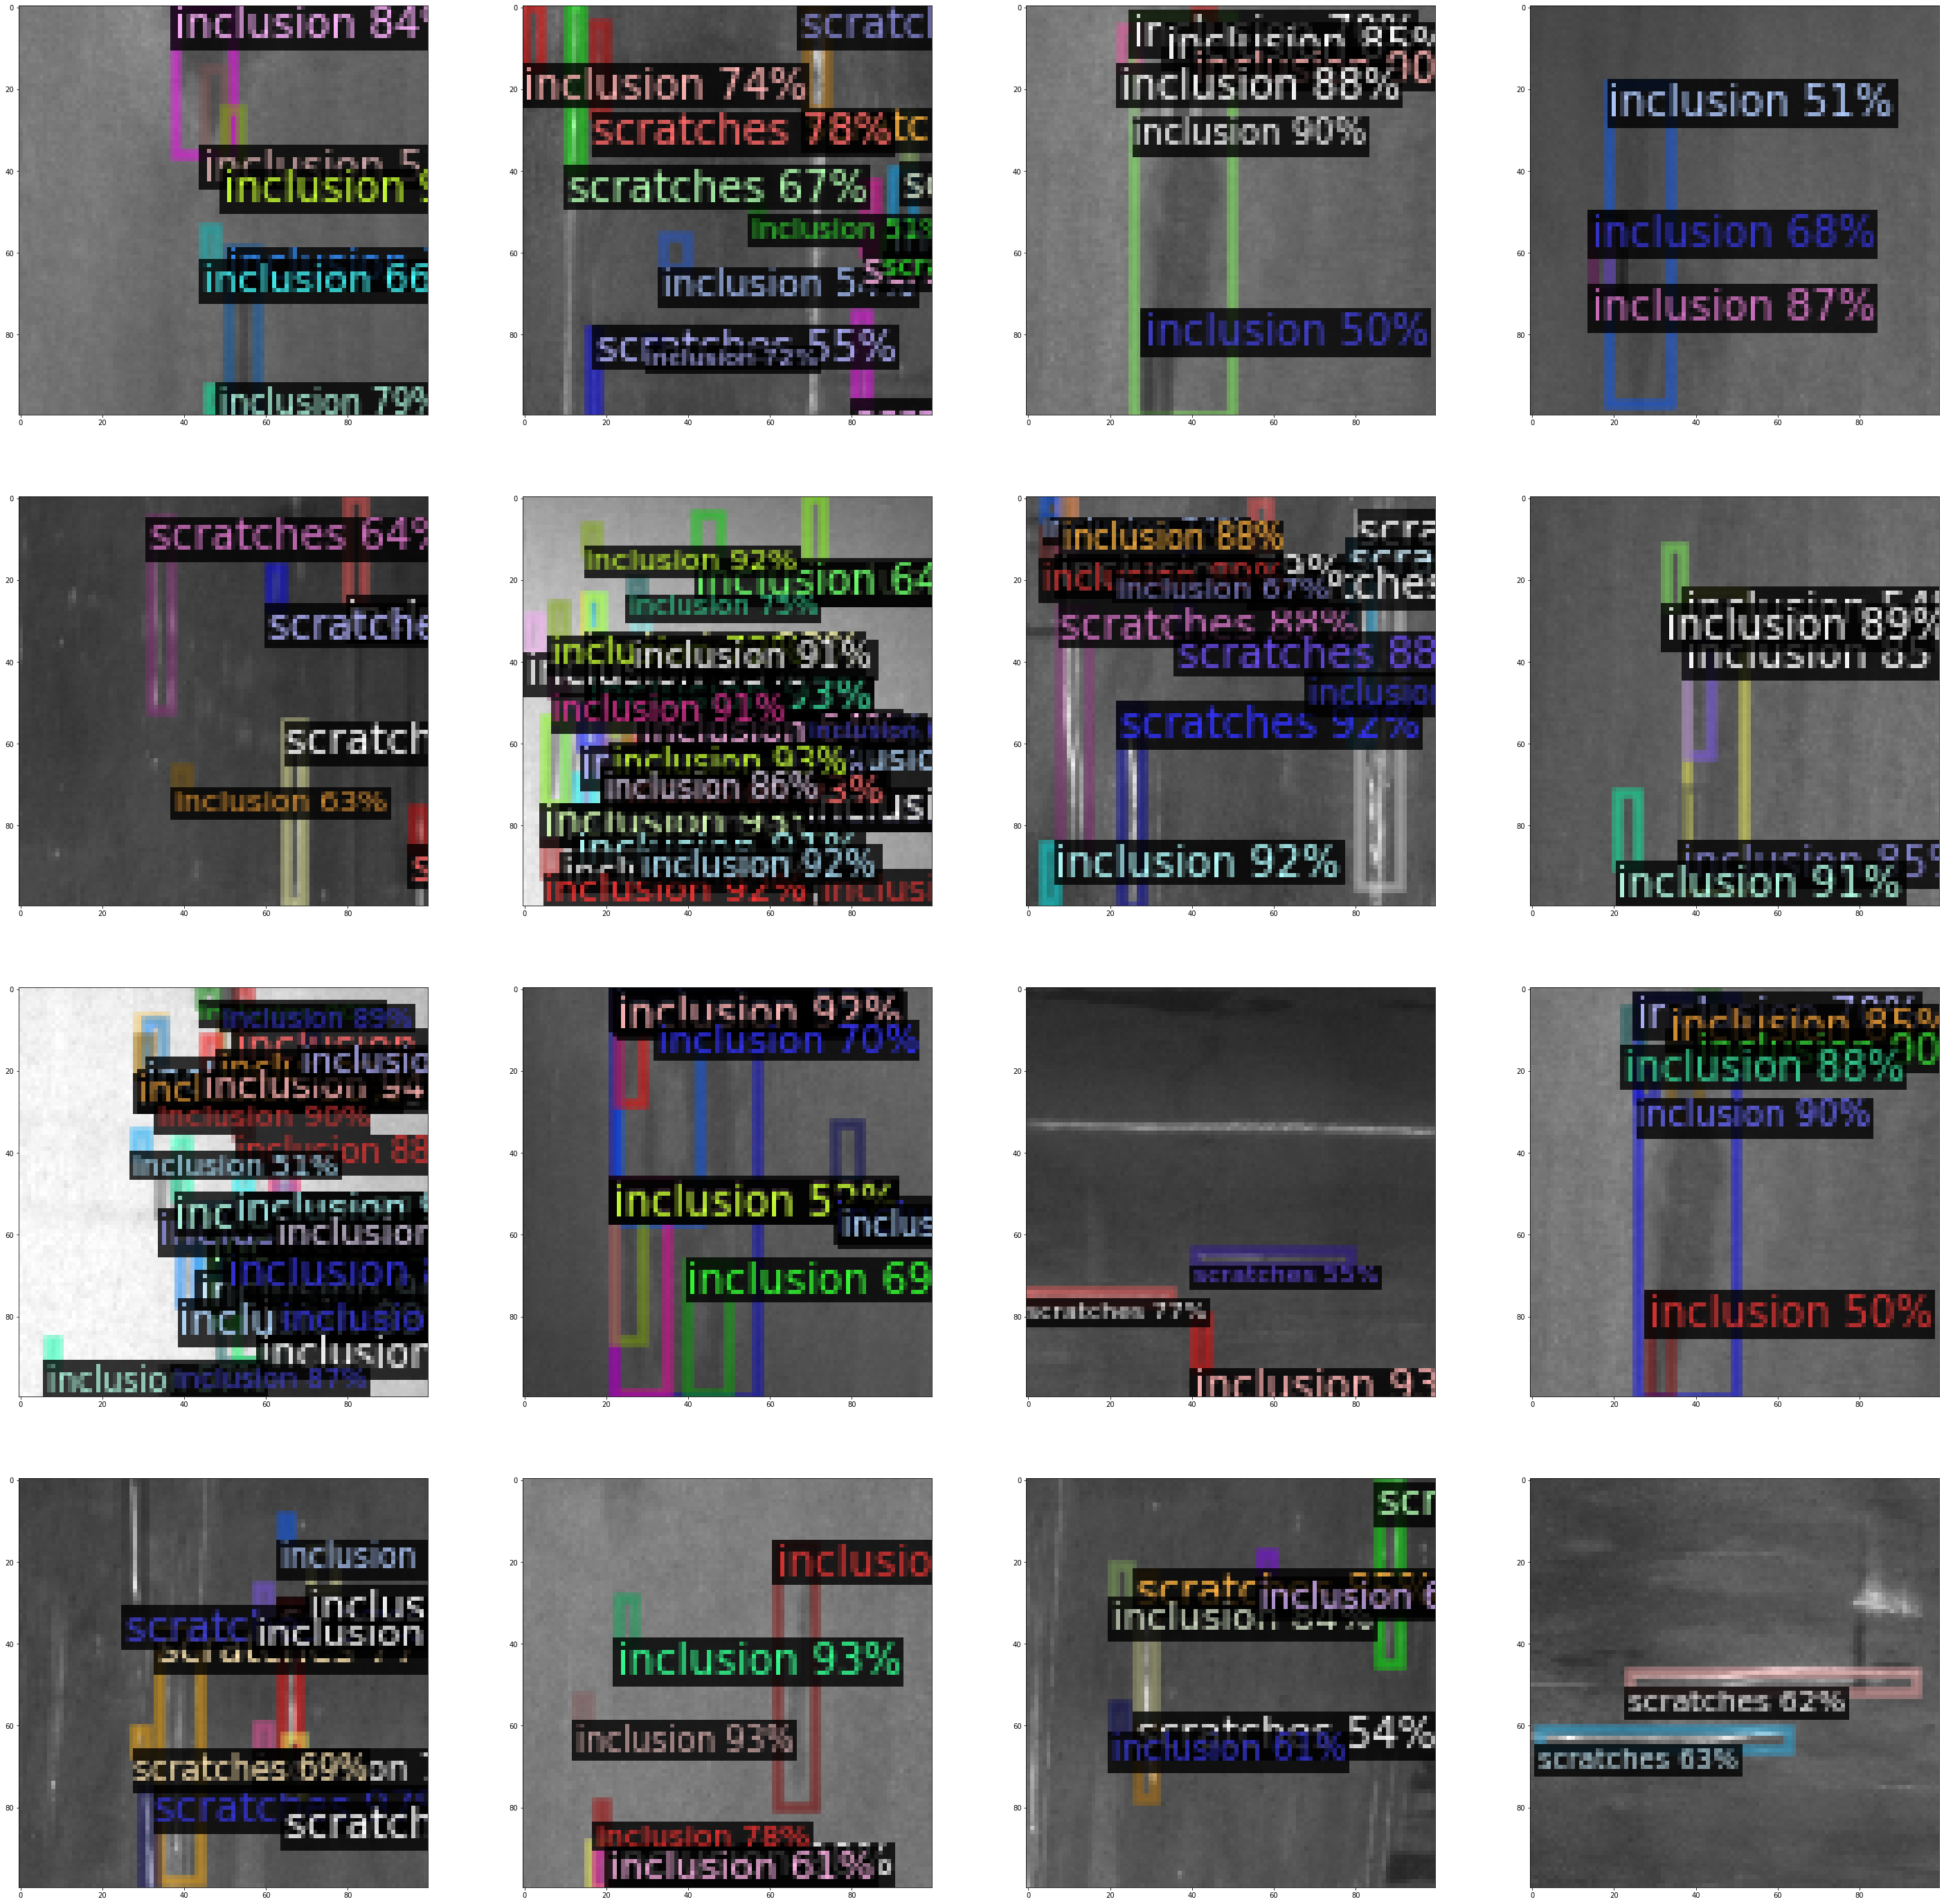

In [5]:
def visualization(metadata, cfg, test_set):
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    predictor = DefaultPredictor(cfg)
    
    fig, axes = plt.subplots(4, 4, figsize=(50, 50))
    axes = axes.flatten()
    for i, d in enumerate(np.random.choice(test_set, 16)):
        im = cv2.imread(d["file_name"])
        outputs = predictor(im)
        v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.5, instance_mode=ColorMode.IMAGE_BW)
        out = v.draw_instance_predictions(outputs["instances"].to('cpu'))
        img = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_RGBA2RGB)
        axes[i].imshow(img)
    fig.show()    

cfg = custom_config(for_training=False)
visualization(metadata, cfg, DatasetCatalog.get('test'))

### 3. Результаты
Итак, полученная модель достигла точности ~42% mAP. Как видно из примеров, на этом уровне она уже может сносно решать поставленную задачу; мы можем рассматривать ее в качестве бейзлайна. Более того, [уже упомянутый ранее результат](https://github.com/Charmve/Surface-Defect-Detection/blob/master/Papers/2019.01/Autonomous%20Structural%20Visual%20Inspection%20Using%20Region-Based%20Deep%20Learning%20for%20Detecting%20Multiple%20Damage%20Types.pdf) подсказывает, что даже не меняя архитектуру модели точность можно значительно повысить, например:
- Продолжив работу над аугументацией и расширив датасет;
- Оптимизировав архитектуру и гиперпараметры модели;
- Применив transfer learning с других схожих датасетов, например: [Severstal steel detection](https://www.kaggle.com/c/severstal-steel-defect-detection), [KollectorSDD](https://www.vicos.si/resources/kolektorsdd/), [NEU-CLS](https://www.kaggle.com/kaustubhdikshit/neu-surface-defect-database/tasks) (возможно, как раз из последнего и взят тренировочный набор - тогда это будет не вполне корректно);

Наконец, более подробный анализ имеющихся источников([1](https://paperswithcode.com/task/defect-detection), [2](https://www.kaggle.com/c/severstal-steel-defect-detection/code?competitionId=14241&sortBy=scoreDescending) и т.п.) может указать на более подходящие для решения задачи архитектуры моделей.